# Intro to Econometrics with Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(10)
# Set max rows displayed for readability
pd.set_option('display.max_rows', 6)
# Plot settings
plot_style = {'xtick.labelsize': 20,
                  'ytick.labelsize': 20,
                  'font.size': 22,
                  'figure.autolayout': True,
                  'figure.figsize': (10, 5.5),
                  'axes.titlesize': 22,
                  'axes.labelsize': 20,
                  'lines.linewidth': 4,
                  'lines.markersize': 6,
                  'legend.fontsize': 16,
                  'mathtext.fontset': 'stix',
                  'font.family': 'STIXGeneral',
                  'legend.frameon': False}
plt.style.use(plot_style)

In this chapter, you'll learn about doing econometrics with code. It assumes some familiarity withe the basics of regression and jumps straight into what you need to know to run regressions.

This chapter uses the **statsmodels** package, along with some others that we've already seen. If you're running this code, you may need to install these packages using, for example, `pip install packagename` on your computer's command line. (If you're not sure what a command line or terminal is, take a quick look at the basics of coding chapter.)

## Basics

There are usually two ways to run regressions in code: specifying a formula in text eg `reg('y ~ x', data=df)`, or specifying columns of a dataframe eg `reg(df['y'], df['x'])`. To add to the confusion, the conventions in economics and in machine learning are the opposite way around in terms of which comes first, the dependent (endogenous) variable or the independent (exogenous) variable. In machine learning, the basic regression might look more like `reg.fit(X, y)` where `X` is a matrix (usually a **numpy** array) and `y` is a vector (ditto). I state these things now to avoid confusion in a later chapter on machine learning! For much of this chapter, we'll assume that you're using a **pandas** dataframe rather than **numpy** arrays because that's a typical econometrics workflow.

Let's start with the absolute basic statistics then: how do we find the mean, standard deviation, covariance matrix, and so on?

`````{tabbed} Matplotlib

````{panels}

```{code-block} python
df.mean()
```
---
figure

````

`````

````{tabbed} seaborn

```{code-block} python
df.mean()
```
some text
````

````{tabbed} plotnine

```{panels}

Content of the left panel.
---
right panel

```

````

## Statistics, Probability Density, and Randomness

SEE https://pingouin-stats.org/

In this section, we'll do a lightning tour of the statistics functions you'll need to do econometrics with code. Most of the basics statistics and probability distribution functions you'll need are provided by the [**scipy**](https://docs.scipy.org/doc/scipy/reference/stats.html) library. For random numbers, we'll rely on [**numpy**](https://numpy.org/doc/stable/reference/random/index.html).

If you haven't already used it, you may need to install these packages using `conda install packagename` or `pip install packagename` on the command line. However, both of these packages are *dependencies* for many, many other packages--so you might find you already have them installed (use `conda list` on the command line to check).

As a reminder, there are two kinds of probability distributions: continuous (that take real-numbered values) and discrete (that can only take a set number of values).

Let's begin with the most simple discrete distribution, a die (it's the singular of dice, okay?). To simulate a die we just need to pick a number from a list of the integers 1 to 6:

In [2]:
np.random.choice(np.arange(1,7))

2

```{note}
Remember that `arange` gives a list of integers of the form `np.arange(start, stop)` inclusive of `start` but exclusive of `stop`.
```

Note that we implicitly assume that each of these discrete values has the same probability. That's true if it's a fair die. Now imagine the die is loaded such that the 6 comes up more often than you'd expect if it was fair; we can simulate this too:

In [3]:
probabilities = [1/7, 1/7, 1/7, 1/7, 1/7, 2/7]
np.random.choice(np.arange(1,7), p=probabilities)

3

Of course, we can't see this effect too well one roll at a time. So let's do 1000 rolls of each die and see if we can spot the difference in the number of times each value comes up. Essentially what we're going to do is take the counts of each outcome and divide by the total number of rolls to get an estimate of the probability, i.e. $p_i = \frac{\text{count}_i}{\text{total}}$ for each possible outcome $i \in (1, 6)$.

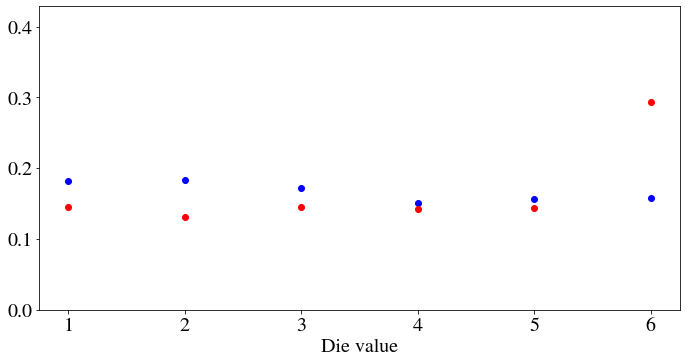

In [4]:
import matplotlib.pyplot as plt

throws = 1000
die_vals = np.arange(1, 7)
fair_throws = np.random.choice(die_vals, size=throws)
load_throws = np.random.choice(die_vals, size=throws, p=probabilities)

_, counts_fair = np.unique(fair_throws, return_counts=True)
_, counts_load = np.unique(load_throws, return_counts=True)


fig, ax = plt.subplots()
ax.scatter(die_vals,
           counts_fair/throws,
           color='b')
ax.scatter(die_vals,
           counts_load/throws,
           color='r')
ax.set_xlabel('Die value')
ax.set_ylim(0., 3/7);

There's already a pretty clear wedge between the chances of a six between the two dice. The `np.unique` function counts how many times the different unique values occur. It usually also returns *what* those unique values are--but we don't need this (we know what values a die has!), so we just use `_` to say we don't care abou the other variable that comes back from calling `np.unique`.

Another way to visualise this is to look at the cumulative distribution function, or cdf.

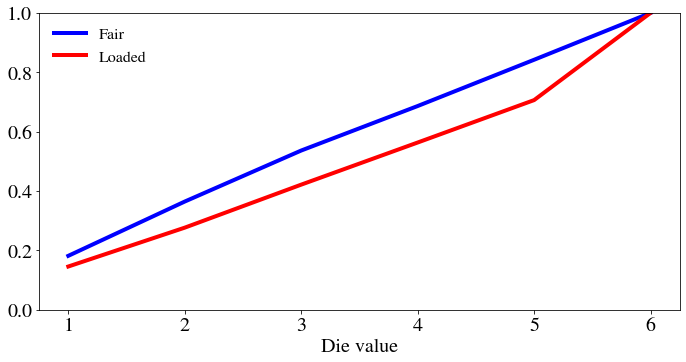

In [5]:
fig, ax = plt.subplots()
ax.plot(die_vals,
        np.cumsum(counts_fair/throws),
        color='b',
        label='Fair')
ax.plot(die_vals,
        np.cumsum(counts_load/throws),
        color='r',
        label='Loaded')
ax.legend(frameon=False)
ax.set_xlabel('Die value')
ax.set_ylim(0., 1.);

On the cumulative plot, we can see that the fair die is a straight line,which indicates that each die value contributes equally, while the loaded die has a kink in it because going from 5 to 6 contributes relative more to the cumulative probability (which sums to unity over all possible outcomes) than does going from any other successive pair.